In [13]:
import numpy as np
import scanpy as sc
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.sparse
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

scanpy==1.10.3 anndata==0.11.0 umap==0.5.7 numpy==1.26.4 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 pynndescent==0.5.13


In [2]:
data = "C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\adata_mononuclear.h5ad"

In [3]:
adata = sc.read_h5ad(data)
adata.uns['log1p']["base"] = None # bug fix

print(adata.obs['sample'].value_counts())
print()
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

sample
granuloma1    495
granuloma2    394
granuloma3    282
Name: count, dtype: int64

X matrix is sparse: False
X size = (1171, 23693)


In [4]:
unique_celltype_sub = adata.obs['cell_type_edit'].unique()
print(unique_celltype_sub)

['DC', 'pDC', 'iMon']
Categories (3, object): ['DC', 'iMon', 'pDC']


In [5]:
replacement_dict = {
    'DC': 0,
    'pDC': 1,
    'iMon': 2
}

In [6]:
adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)

C:\Users\bence\AppData\Local\Temp\ipykernel_178812\975682991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)
C:\Users\bence\AppData\Local\Temp\ipykernel_178812\975682991.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)


In [7]:
adata.obs['celltype']

AAACCTGCAAGGGTCA_sc69_1    0
AAACCTGTCAAGCCTA_sc69_1    0
AAACGGGCACAGCCCA_sc69_1    0
AAAGATGCACGTCAGC_sc69_1    1
AAATGCCGTGAGGCTA_sc69_1    1
                          ..
TTGGCAATCAACCATG_sc72_1    0
TTGGCAATCTGTCAAG_sc72_1    1
TTGTAGGCATACTCTT_sc72_1    0
TTGTAGGGTAGAGTGC_sc72_1    0
TTTCCTCTCAACACGT_sc72_1    2
Name: celltype, Length: 1171, dtype: category
Categories (3, int64): [0, 2, 1]

In [8]:
print("Unique values in 'celltype' column after replacement:", adata.obs['celltype'].unique())

Unique values in 'celltype' column after replacement: [0, 1, 2]
Categories (3, int64): [0, 2, 1]


In [9]:
cell_type_counts = adata.obs['cell_type_edit'].value_counts()

print("Number of cells in each cell type:")
print(cell_type_counts)

Number of cells in each cell type:
cell_type_edit
DC      774
pDC     286
iMon    111
Name: count, dtype: int64


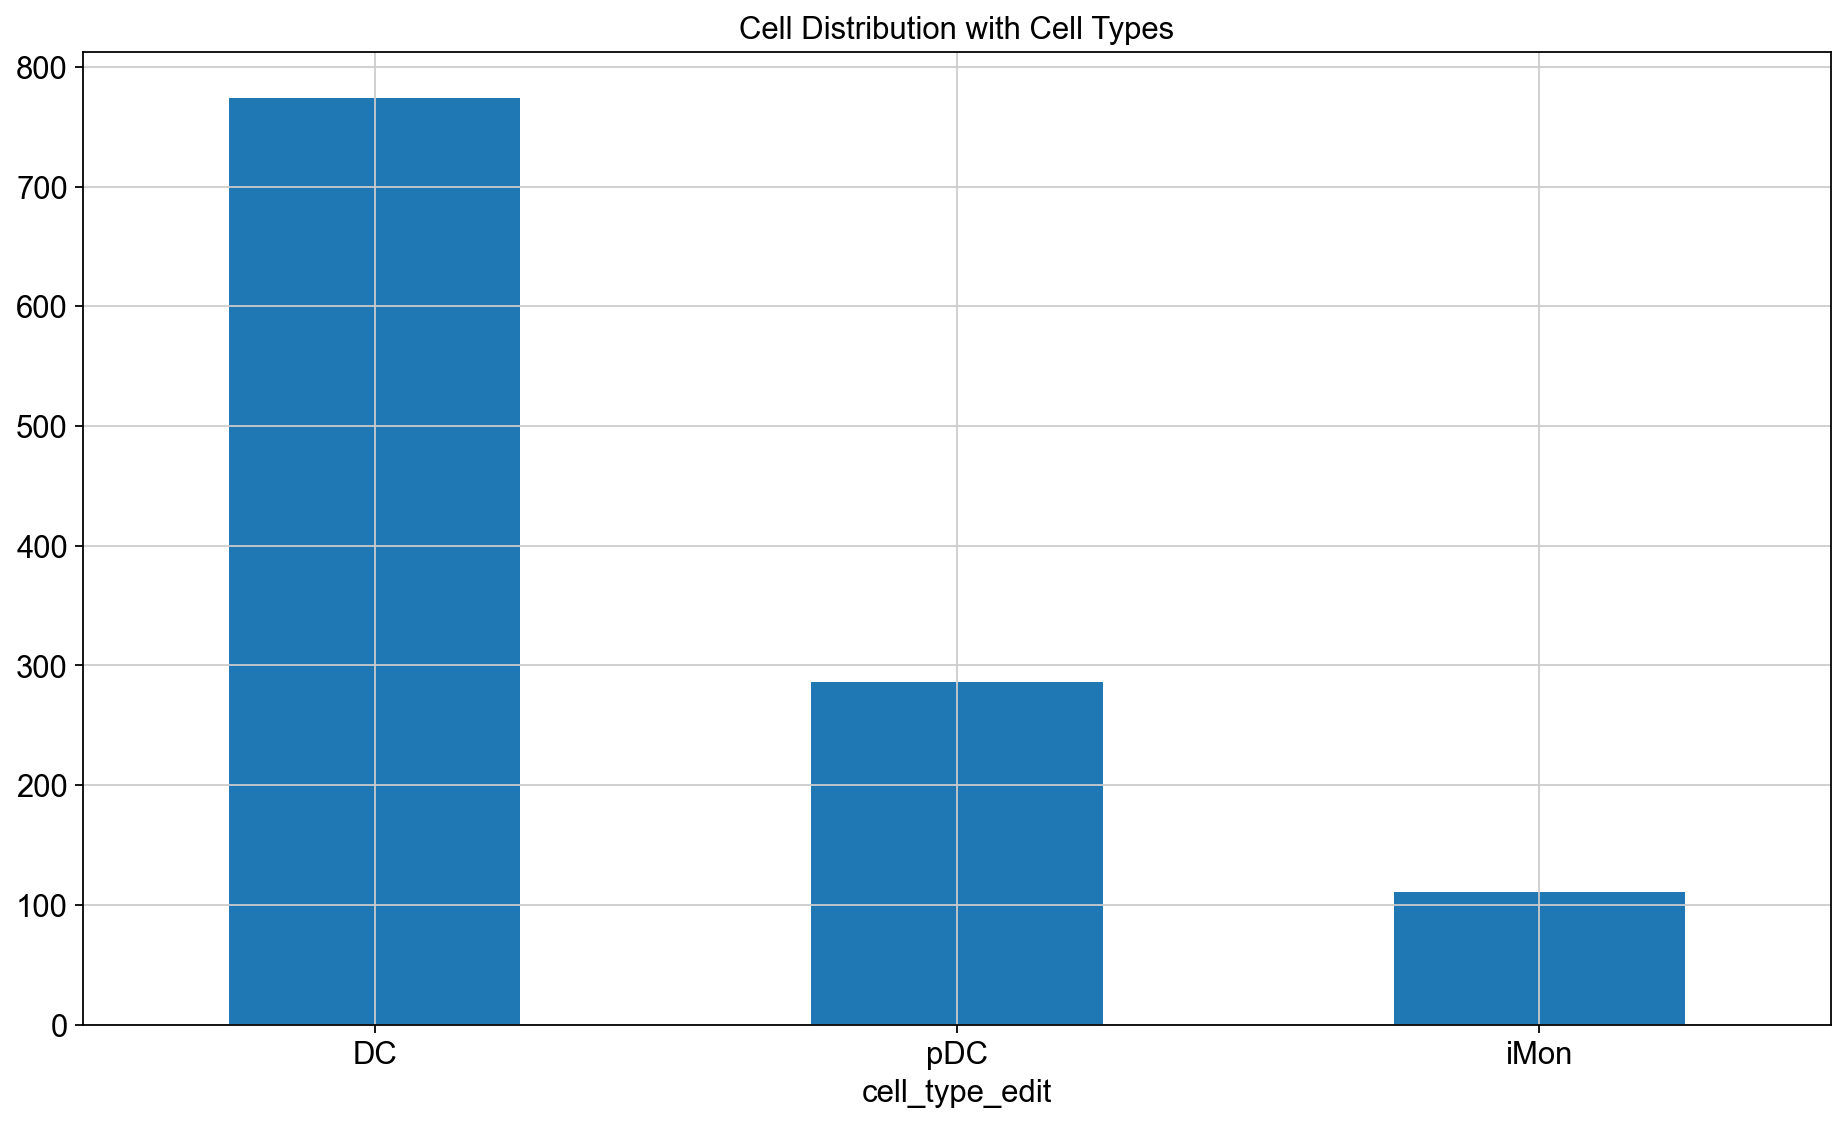

In [10]:
# cell distribution with cell types
y = adata.obs['cell_type_edit']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Cell Types')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

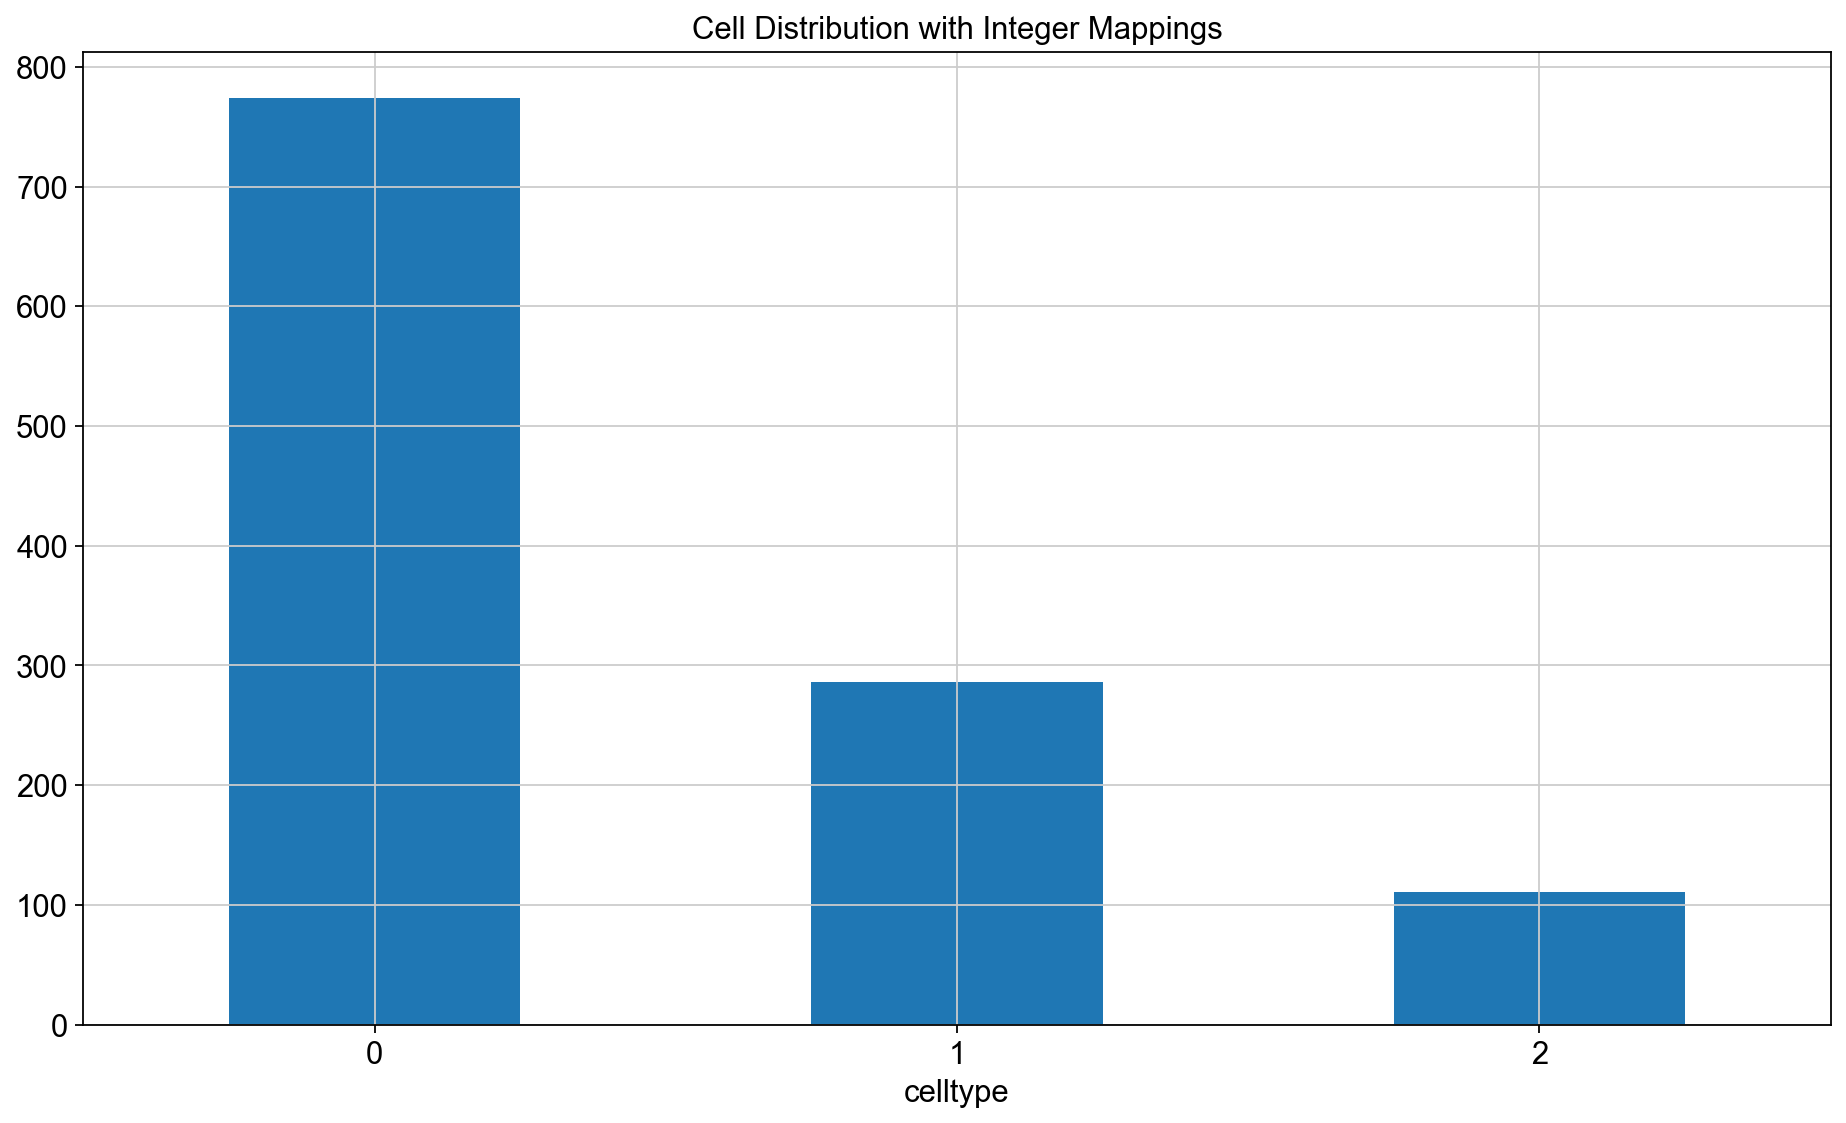

In [11]:
# cell distribution with int mappings
y = adata.obs['celltype']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Integer Mappings')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

In [14]:
X = adata.X
y = adata.obs['celltype'].values

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state=60)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size = 0.25, random_state=25)

train_features = np.array(train_features)
test_features = np.array(test_features)
val_features = np.array(val_features)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=train_labels
)

print('Sample weights shape:', sample_weights.shape)

np.save('../../Arrays/train_features_mononuclear.npy', train_features)
np.save('../../Arrays/test_features_mononuclear.npy', test_features)
np.save('../../Arrays/val_features_mononuclear.npy', val_features)
np.save('../../Arrays/train_labels_mononuclear.npy', train_labels)
np.save('../../Arrays/test_labels_mononuclear.npy', test_labels)
np.save('../../Arrays/val_labels_mononuclear.npy', val_labels)
np.save('../../Arrays/sample_weights_mononuclear.npy', sample_weights)

Training features shape: (702, 23693)
Validation features shape: (234, 23693)
Test features shape: (235, 23693)
Training labels shape: (702,)
Validation labels shape: (234,)
Test labels shape: (235,)
Sample weights shape: (702,)
